In [3]:
import numpy as np #math
import matplotlib.pyplot as plt #graphs and plots
import pandas as pd #Data manipulation
import seaborn as sns #Visualization
%matplotlib inline 
#Includes the plot inside the notebook
#% Makes it a proxy for a commmandline
#sns.set(color_codes = True)

In [4]:
#Loading data into the workbook
df = pd.read_csv('/Users/MACOS/Downloads/novel-corona-virus-2019-dataset/covid_19_data.csv')


In [5]:
#I. EDA
#I.1. Display the top and bottom observations
dfhead = df.head()
dftail = df.tail(10)
print(dfhead)

   SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0  


In [6]:
#I.2. Check the data types
dftype = df.dtypes
print(dftype)

SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object


In [7]:
#I.3. Cleaning the data
df = df.drop(['SNo', 'Last Update'], axis=1)

In [8]:
#Shape of the data
df.shape

(20574, 6)

In [9]:
#I.4. Cleaning the data
#a. Dropping Duplicates
duplicaterows = df[df.duplicated()]
print(duplicaterows.shape)
if duplicaterows.shape[0]==0:
    print("There is no duplicate rows")
else:
    df = df.drop_duplicates()
#b. Dropping missing values
print(df.isnull().sum())
#num_missing = (df['Confirmed'] == 0).sum()
#dataset.fillna(dataset.mean(), inplace=True)
# df = df.dropna() # Dropping NA values
#c. Replacing missing values with the mean of the rest

(0, 6)
There is no duplicate rows
ObservationDate        0
Province/State     10548
Country/Region         0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64


In [10]:
#I.5 Detecting outliers
#sns.boxplot(x=df[['ObservationDate', 'Country/Region', 'Confirmed','Deaths']])
#Quantiles
#Q1 = df.quantile(0.25)
#Q3 = df.quantile(0.75)
#IQR = Q3 — Q1
#print(IQR)

In [12]:
#I.6 Modifying - Add variables
Area = list(df['Province/State'] + ' - ' + df['Country/Region'])
df['Area'] = Area
df = df.drop(['Province/State'], axis=1)
print(df.head())

  ObservationDate  Country/Region  Confirmed  Deaths  Recovered  \
0      01/22/2020  Mainland China        1.0     0.0        0.0   
1      01/22/2020  Mainland China       14.0     0.0        0.0   
2      01/22/2020  Mainland China        6.0     0.0        0.0   
3      01/22/2020  Mainland China        1.0     0.0        0.0   
4      01/22/2020  Mainland China        0.0     0.0        0.0   

                         Area  
0      Anhui - Mainland China  
1    Beijing - Mainland China  
2  Chongqing - Mainland China  
3     Fujian - Mainland China  
4      Gansu - Mainland China  


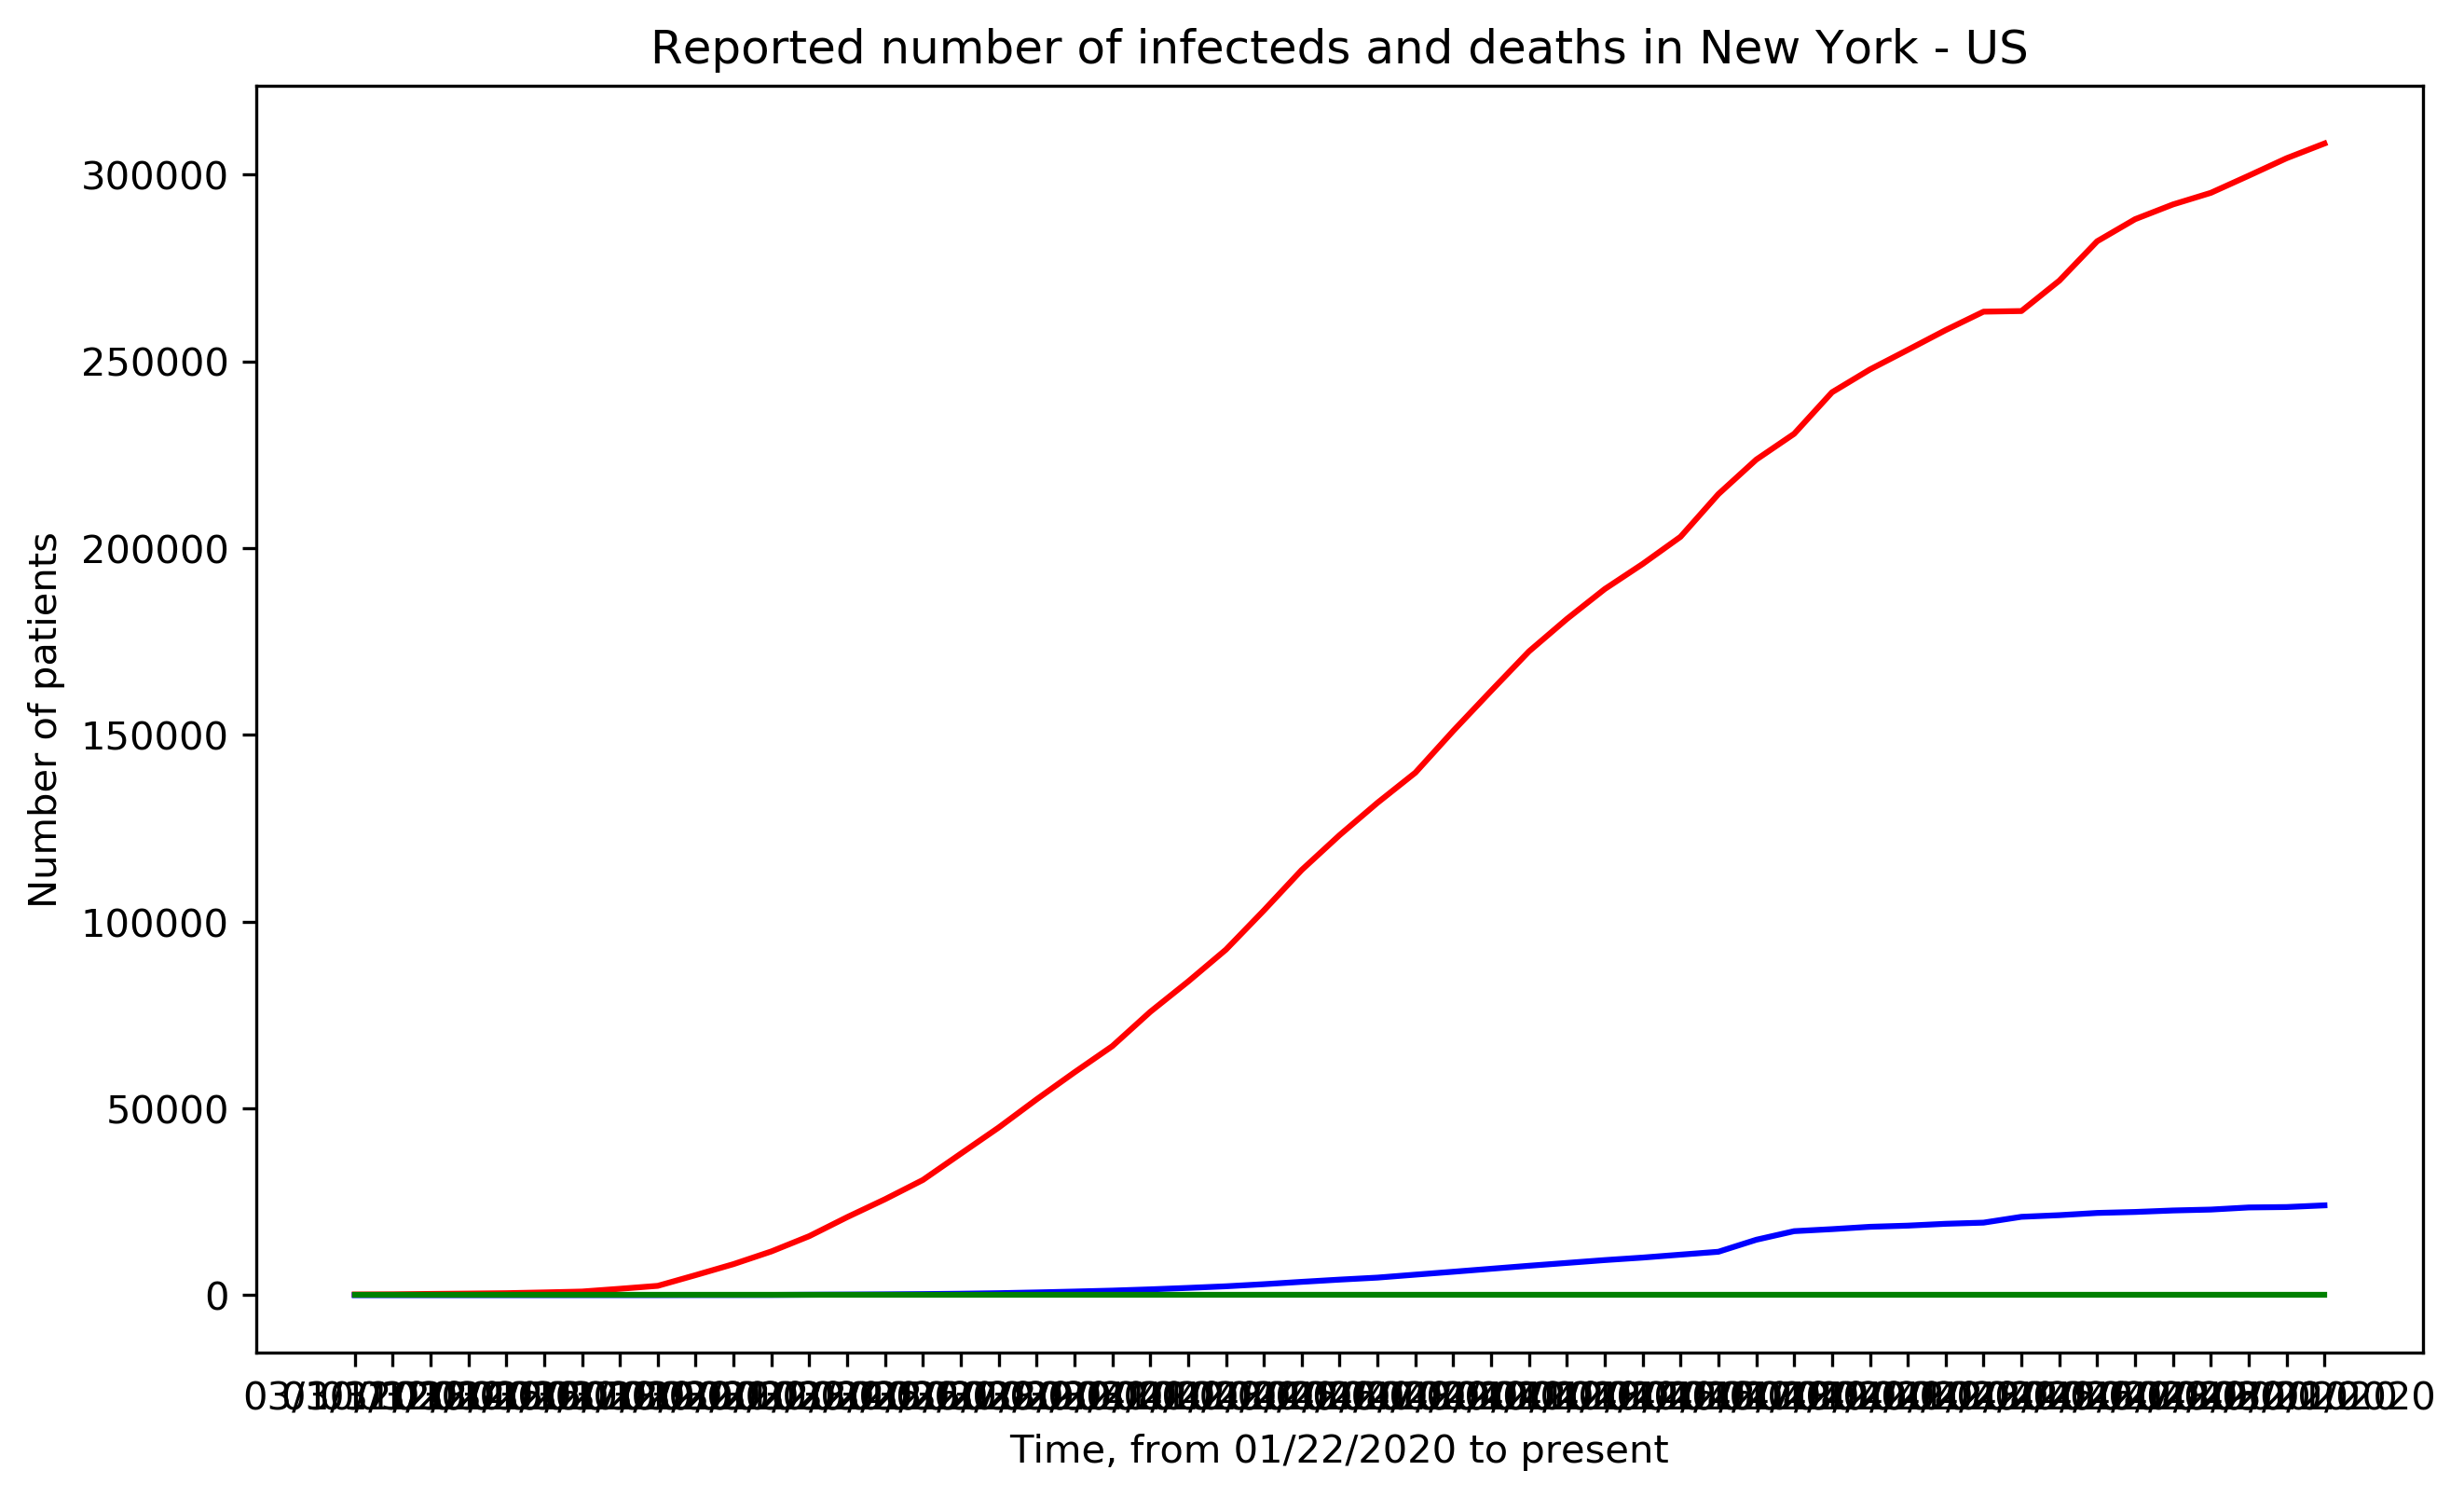

In [55]:
import plotly.io as pio
#I.6. Visualization
#a. Line graphs of every place recorded
Place = 'New York - US' #Modify this string to change the 
DateofPlace = list()
ConfirmedsatPlace = list()
DeathsatPlace = list()
RecoveredsatPlace = list()
for i in range(df.shape[0]):
    if(df['Area'][i] == Place):
        DateofPlace.append(df['ObservationDate'][i])
        ConfirmedsatPlace.append(df['Confirmed'][i])
        DeathsatPlace.append(df['Deaths'][i])
        RecoveredsatPlace.append(df['Recovered'][i])
#print(DateofPlace)
#print(ConfirmedsatPlace)
#print(DeathsatPlace)
#print(RecoveredsatPlace)

#Ploting these line against time
fig = plt.figure(figsize = (10,6), dpi = 300)
plt.plot(DateofPlace, ConfirmedsatPlace, color = 'r')
plt.plot(DateofPlace, DeathsatPlace, color = 'b')
plt.plot(DateofPlace, RecoveredsatPlace, color = 'g')
plt.xlabel('Time, from 01/22/2020 to present')
plt.ylabel('Number of patients')
plt.title('Reported number of infecteds and deaths in ' + Place)
plt.show()
#f = plt.figure()
#f.show()
#pio.write_image(f, 'Plot.png')
fig.savefig(Place + ".png", dpi = 300) #save figure

In [45]:
#I.6. Graphs 
#a. Histogram
#df.Deaths.value_counts().plot(kind='bar', figsize=(10,5))
#plt.title(“Number of cars by make”)
#plt.ylabel(‘Number of cars’)
#plt.xlabel(‘Make’);

#b. Scatter plot
#fig, ax = plt.subplots(figsize=(10,6))
#ax.scatter(df[‘HP’], df[‘Price’])
#ax.set_xlabel(‘HP’)
#ax.set_ylabel(‘Price’)
#plt.show()

#c. Heat Map
#plt.figure(figsize=(20,10))
#c= df.corr()
#sns.heatmap(c,cmap=”BrBG”,annot=True)
#c